 1、Flowchart，When the input values are a = 5, b = 15, c = 10, the output is empty.

In [3]:
def Print_values(a,b,c):
    if a>b:
        if b>c:
            print(a+b-10*c)
        else:
            if a>c:
                print(a+c-10*b)
            else:
                print(c+a-10*b)
    else:
        if b>c:
            pass
        else:
            print(c+b-10*a)

a=float(input("input number1:"))
b=float(input("input number2:"))
c=float(input("input number3:"))
Print_values(a,b,c)


input number1: 15
input number2: 5
input number3: 10


-25.0


 2、Continuous celing function

In [6]:
def continuous_ceil(list_int):
    import math
    list_ceil=[]
    for i in list_int:
        if i==1:
            list_ceil.append(1)
        else:
            ceil_number=math.ceil(i/3)+2*i
            list_ceil.append(ceil_number)
    print(list_ceil)

import random
list_int=random.sample(range(1,101),15)
print (list_int)
continuous_ceil(list_int)
        

[71, 2, 86, 16, 52, 61, 5, 44, 81, 22, 28, 32, 19, 78, 41]
[166, 5, 201, 38, 122, 143, 12, 103, 189, 52, 66, 75, 45, 182, 96]


3、 Dice rolling， the number is 35.

In [20]:
def Find_number_of_ways(x):
    if x < 10 or x > 60:
        print('This number is out of range！')
        return 0
    dice = [[0] * (x + 1) for _ in range(11)] # create a 2D list，11 lines and x+1 coloumns
    dice[0][0] = 1
    for i in range(1, 11): 
        for j in range(1, x + 1): 
            for k in range(1, 7): 
                if j - k >= 0:
                    dice[i][j] += dice[i-1][j-k]
    return dice[10][x]

Number_of_ways = [Find_number_of_ways(x) for x in range(10, 61)]
max_ways = max(Number_of_ways)
max_sum = Number_of_ways.index(max_ways) + 10

print(f"点数和 {max_sum} 有最多的方式数: {max_ways}")
    

点数和 35 有最多的方式数: 4395456


4、 Dynamic programming

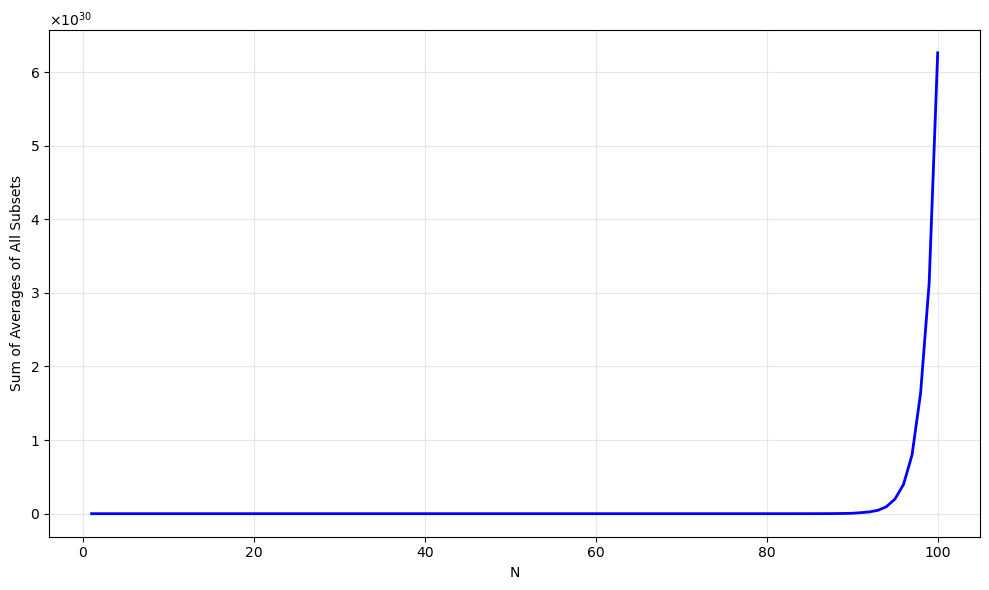

In [5]:
def Random_integer(number):
    import random
    list_integer=[]
    for i in range(number):
        list_integer.append(random.randint(0,10))
    return list_integer

def Sum_averages(input_list):
    import numpy as np
    n = len(input_list)
    dp_sum = np.zeros(n + 1)
    dp_count = np.zeros(n + 1)
    dp_sum[0] = 0
    dp_count[0] = 1 
    for x in input_list:
        new_sum = dp_sum.copy()
        new_count = dp_count.copy()
        for k in range(1, n + 1):
            new_sum[k] += dp_sum[k - 1] + x * dp_count[k - 1]
            new_count[k] += dp_count[k - 1]
        dp_sum, dp_count = new_sum, new_count
    total = sum(dp_sum[k] / k for k in range(1, n + 1))
    return total

Total_sum_averages = []
N_values = list(range(1, 101))
for N in N_values:
    list_int = Random_integer(N)
    average = Sum_averages(list_int)
    Total_sum_averages.append(average)
    
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.figure(figsize=(10, 6))
plt.plot(N_values, Total_sum_averages, 'b-', linewidth=2)
plt.xlabel('N')
plt.ylabel('Sum of Averages of All Subsets')
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
        
        

5、Path counting

In [1]:
import numpy as np
import random

def create_matrix(N, M):
    matrix = np.random.randint(0, 2, (N, M))
    matrix[0, 0] = 1
    matrix[N-1, M-1] = 1
    return matrix
    
matrix = create_matrix(5,5) # question 5.1 test
print(matrix)

def Count_path(matrix):
    n, m = matrix.shape
    dp = np.zeros((n, m), dtype=int)
    if matrix[0, 0] == 1:
        dp[0, 0] = 1
    for i in range(1, n):
        if matrix[i, 0] == 1:
            dp[i, 0] = dp[i-1, 0]  
    for j in range(1, m):
        if matrix[0, j] == 1:
            dp[0, j] = dp[0, j-1]
    for i in range(1, n):
        for j in range(1, m):
            if matrix[i, j] == 1:
                dp[i, j] = dp[i-1, j] + dp[i, j-1]
    return dp[n-1, m-1]

num_runs = 1000
path_counts = []
for i in range(num_runs):
    matrix = create_matrix(10, 8)
    path_count = Count_path(matrix)
    path_counts.append(path_count)
mean_paths = np.mean(path_counts)
print(f"平均路径数量: {mean_paths:.4f}")


[[1 0 1 0 1]
 [0 0 1 1 0]
 [0 0 0 0 1]
 [0 1 0 1 1]
 [0 1 0 0 1]]
平均路径数量: 0.4410
